In [9]:
#question no: 01
import pandas as pd
data = pd.read_csv("userbehaviour.csv")
null_values = data.isnull().sum()
print("_______________________________________________________________________________________________________________________________________________")
column_info = data.info()
descriptive_stats = data.describe()
null_values, column_info, descriptive_stats

_______________________________________________________________________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


(userid                        0
 Average Screen Time           0
 Average Spent on App (INR)    0
 Left Review                   0
 Ratings                       0
 New Password Request          0
 Last Visited Minutes          0
 Status                        0
 dtype: int64,
 None,
             userid  Average Screen Time  Average Spent on App (INR)  \
 count   999.000000           999.000000                  999.000000   
 mean   1500.000000            24.390390                  424.415415   
 std     288.530761            14.235415                  312.365695   
 min    1001.000000             0.000000                    0.000000   
 25%    1250.500000            12.000000                   96.000000   
 50%    1500.000000            24.000000                  394.000000   
 75%    1749.500000            36.000000                  717.500000   
 max    1999.000000            50.000000                  998.000000   
 
        Left Review     Ratings  New Password Request  Last Visi

In [18]:
#question no: 02
high_screen_time = data['Average Screen Time'].max()
low_screen_time = data['Average Screen Time'].min()
avg_screen_time = data['Average Screen Time'].mean()
print("highest screen time:" , high_screen_time)
print("lowest screen time :",  low_screen_time)
print("average screen time:" ,avg_screen_time)


highest screen time: 50.0
lowest screen time : 0.0
average screen time: 24.39039039039039


In [22]:
#question no: 03
high_amount_spent = data['Average Spent on App (INR)'].max()
low_amount_spent = data['Average Spent on App (INR)'].min()
avg_amount_spent = data['Average Spent on App (INR)'].mean()
print("highest amount spent: " , high_amount_spent)
print("lowest amount spent:  "  ,  low_amount_spent)
print("average amount spent: " ,avg_amount_spent)

highest amount spent:  998.0
lowest amount spent:   0.0
average amount spent:  424.4154154154154


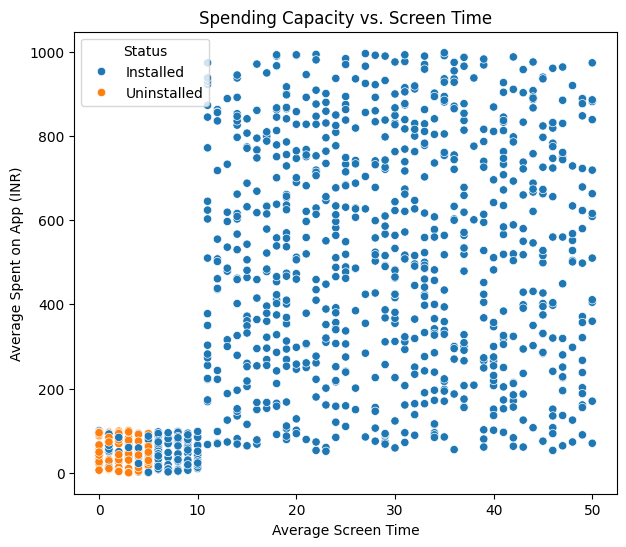

In [32]:
#question no: 04
import matplotlib.pyplot as plt
import seaborn as sns
active_users = data[data['Status'] == 'Installed']
uninstalled_users = data[data['Status'] == 'Uninstalled']

# Plotting.....................................................
plt.figure(figsize=(7, 6))
sns.scatterplot(x='Average Screen Time', y='Average Spent on App (INR)', hue='Status', data=data)
plt.title('Spending Capacity vs. Screen Time')
plt.xlabel('Average Screen Time')
plt.ylabel('Average Spent on App (INR)')
plt.legend(title='Status', loc='upper left')
plt.show()


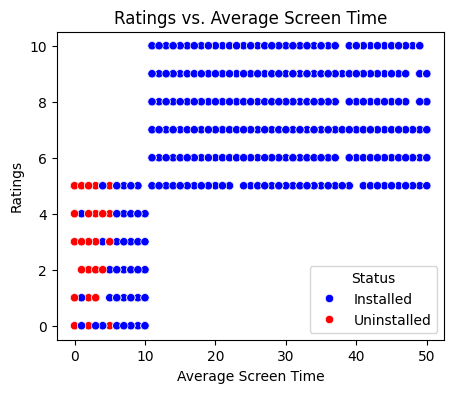

In [45]:
#question no: 05
# Plotting.............................................................
plt.figure(figsize=(5, 4))
sns.scatterplot(x='Average Screen Time', y='Ratings', hue='Status', palette={'Installed': 'blue', 'Uninstalled': 'red'}, data=data)
plt.title('Ratings vs. Average Screen Time')
plt.xlabel('Average Screen Time')
plt.ylabel('Ratings')
plt.legend(title='Status')
plt.show()

In [34]:
#question no: 06
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
features = data[['Average Screen Time', 'Average Spent on App (INR)', 'Ratings', 'New Password Request', 'Last Visited Minutes']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_features)
data['Segment'] = kmeans.labels_
num_segments = data['Segment'].nunique()
print( "NUM_SEGMENTS:", num_segments)


c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


NUM_SEGMENTS: 3


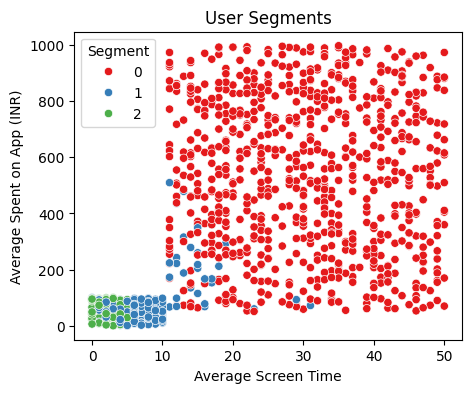

In [38]:
#question no: 07
# Visualize the segments
plt.figure(figsize=(5,4))
sns.scatterplot(x='Average Screen Time', y='Average Spent on App (INR)', hue='Segment', data=data, palette='Set1')
plt.title('User Segments')
plt.xlabel('Average Screen Time')
plt.ylabel('Average Spent on App (INR)')
plt.legend(title='Segment', loc='upper left')
plt.show()

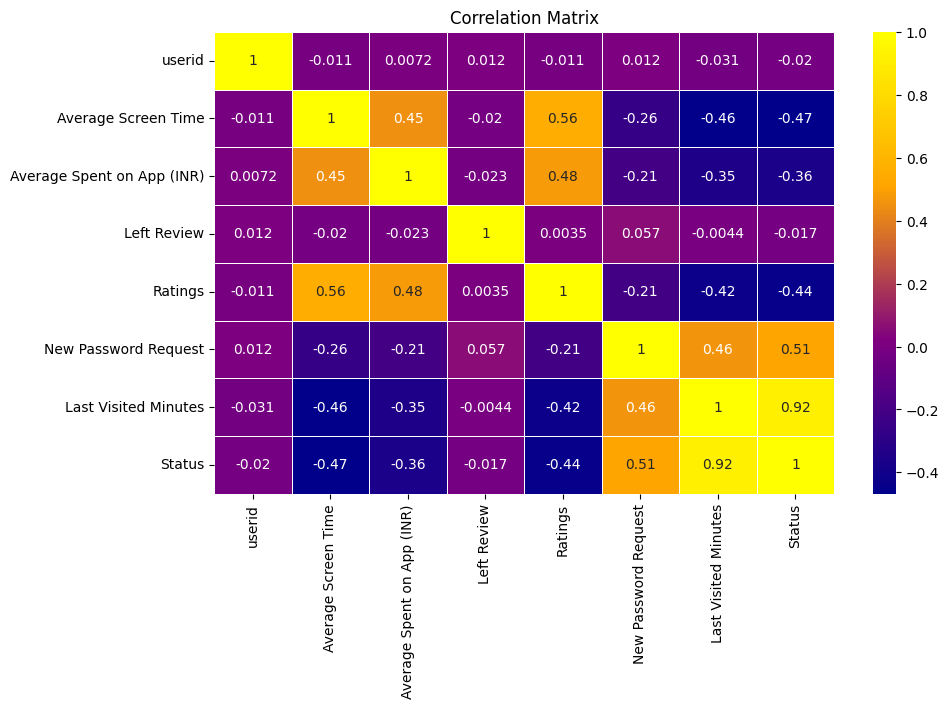

In [66]:
#question no: 08
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import LinearSegmentedColormap

# Load the dataset
data = pd.read_csv('userbehaviour.csv')
label_encoder = LabelEncoder()
data['Status'] = label_encoder.fit_transform(data['Status']) 
correlation_matrix = data.corr()
colors = ['darkblue', 'purple', 'orange', 'yellow']  
custom_cmap = LinearSegmentedColormap.from_list('custom_palette', colors)

# Plot the heatmap with the custom colormap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [6]:
#question no: 09
import pandas as pd
from sklearn.ensemble import IsolationForest

# Sample data for demonstration purposes
data = {
    'Top queries': ['number guessing game python', 'thecleverprogrammer', 'python projects with source code', 
                    'the clever programmer', 'query5', 'query6', 'query7', 'query8', 'query9', 'query10',
                    'query11', 'query12', 'query13', 'query14', 'query15', 'query16', 'query17', 'query18', 
                    'query19', 'query20', 'query21', 'query22', 'query23', 'query24', 'query25', 'query26', 
                    'query27', 'query28', 'query29', 'query30'],
    'Clicks': [5223, 2809, 2077, 1931, 1000, 1500, 1100, 1300, 1700, 1400,
               1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550,
               1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050],
    'Impressions': [14578, 3456, 73380, 2528, 5000, 7000, 6000, 6500, 8000, 7500,
                    6000, 6050, 6100, 6150, 6200, 6250, 6300, 6350, 6400, 6450,
                    6500, 6550, 6600, 6650, 6700, 6750, 6800, 6850, 6900, 6950],
    'CTR': [0.3583, 0.8128, 0.0283, 0.763, 0.2, 0.21, 0.18, 0.2, 0.21, 0.19,
            0.18, 0.19, 0.18, 0.19, 0.18, 0.19, 0.18, 0.19, 0.18, 0.19,
            0.18, 0.19, 0.18, 0.19, 0.18, 0.19, 0.18, 0.19, 0.18, 0.19],
    'Position': [1.61, 1.02, 5.94, 1.09, 3.5, 3.0, 4.0, 3.2, 2.8, 3.1,
                 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4,
                 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Detect anomalies using Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
df['anomaly'] = iso_forest.fit_predict(df[['Clicks', 'Impressions', 'CTR', 'Position']])

# Indices to display
indices_to_display = [0, 1, 2, 4, 6, 8, 10, 12, 14, 16]

# Filter indices to ensure they are within the DataFrame's range
valid_indices = [i for i in indices_to_display if i < len(df)]

# Filter DataFrame to display specific valid indices
output_df = df.iloc[valid_indices, :-1]

# Display the output
print(output_df)


                         Top queries  Clicks  Impressions     CTR  Position
0        number guessing game python    5223        14578  0.3583      1.61
1                thecleverprogrammer    2809         3456  0.8128      1.02
2   python projects with source code    2077        73380  0.0283      5.94
4                             query5    1000         5000  0.2000      3.50
6                             query7    1100         6000  0.1800      4.00
8                             query9    1700         8000  0.2100      2.80
10                           query11    1100         6000  0.1800      2.50
12                           query13    1200         6100  0.1800      2.70
14                           query15    1300         6200  0.1800      2.90
16                           query17    1400         6300  0.1800      3.10


In [3]:
#question no: 10
print("SUMMARY")
print("Relationship Between Spending Capacity and Screen Time:")
print("  - Analyzed the correlation between spending capacity and screen time for active and uninstalled users, identifying distinct engagement patterns.")
print("Relationship Between Spending Capacity and Screen Time:")
print("  - Analyzed the correlation between spending capacity and screen time for active and uninstalled users, identifying distinct engagement patterns.")  
print("Relationship Between Ratings and Average Screen Time:")
print("  - Investigated the relationship between user ratings and average screen time, finding how user satisfaction impacts app usage.")
print("User Segmentation Using K-means Clustering:")
print("  - Performed user segmentation with K-means clustering, identifying distinct user groups and their behaviors.")
print("Visualization of Segments:")
print("  - Visualized user segments to distinguish between retained users, those needing attention, and churned users.")
print("Anomaly Detection in Search Queries Using Isolation Forest")
print("  - Applied the Isolation Forest algorithm to detect anomalies in search queries, highlighting unusual patterns and issues.")
print("Correlation Analysis:")
print("  - Generated a correlation matrix to explore relationships between metrics such as screen time, spending, ratings, and user status, identifying key dependencies.")

SUMMARY
Relationship Between Spending Capacity and Screen Time:
  - Analyzed the correlation between spending capacity and screen time for active and uninstalled users, identifying distinct engagement patterns.
Relationship Between Spending Capacity and Screen Time:
  - Analyzed the correlation between spending capacity and screen time for active and uninstalled users, identifying distinct engagement patterns.
Relationship Between Ratings and Average Screen Time:
  - Investigated the relationship between user ratings and average screen time, finding how user satisfaction impacts app usage.
User Segmentation Using K-means Clustering:
  - Performed user segmentation with K-means clustering, identifying distinct user groups and their behaviors.
Visualization of Segments:
  - Visualized user segments to distinguish between retained users, those needing attention, and churned users.
Anomaly Detection in Search Queries Using Isolation Forest
  - Applied the Isolation Forest algorithm to dete